# Results discussion

### This section summarize the output of all models and generate necessary plots/visualizations for the report.

In [97]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Directory containing the model log CSV files
model_logs_directory = "model_outputs_data"

# Paths to saved model output data (Training and Testing outputs of models)
training_log_files = {
    "AlexNet": "model_evaluation_logs/training_logs_alexnet.csv",
    "ResNet50": "model_evaluation_logs/training_logs_resnet50.csv",
    "InceptionV1": "model_evaluation_logs/training_logs_inceptionv1.csv",
    "InceptionV3": "model_evaluation_logs/training_logs_inceptionv3.csv",
    "DenseNet121": "model_evaluation_logs/training_logs_densenet121.csv",
    "EfficientNet": "model_evaluation_logs/training_logs_efficientnet.csv"
}

prediction_log_files = {
    "AlexNet": "model_prediction_logs/alexnet_labels_predictions.csv",
    "ResNet50": "model_prediction_logs/resnet50_labels_predictions.csv",
    "InceptionV1": "model_prediction_logs/inceptionv1_labels_predictions.csv",
    "InceptionV3": "model_prediction_logs/inceptionv3_labels_predictions.csv",
    "DenseNet121": "model_prediction_logs/densenet121_labels_predictions.csv",
    "EfficientNet": "model_prediction_logs/efficientnet_labels_predictions.csv"
}

## Plot Validation Loss

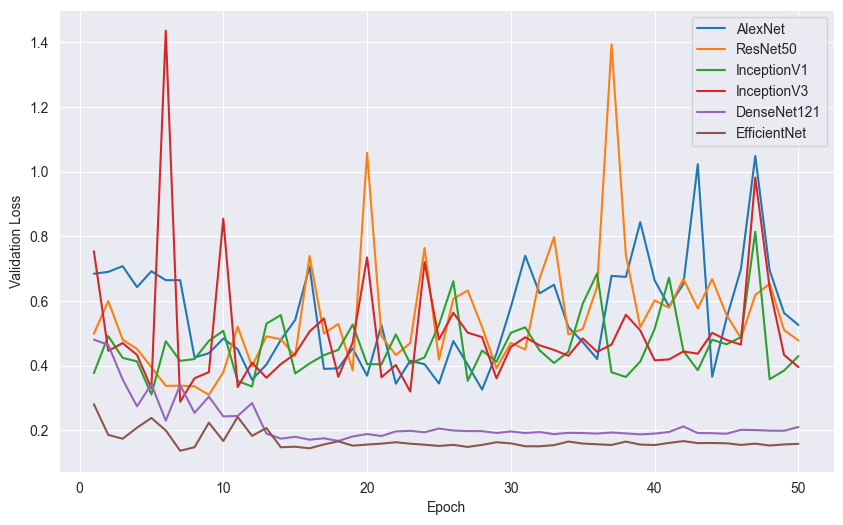

In [94]:
plt.figure(figsize=(10, 6))

# Loop over each log file to plot validation loss
for model_name, relative_path in training_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        # Load the CSV data
        log_data = pd.read_csv(file_path)
        
        # Plot validation loss
        plt.plot(log_data["Epoch"], log_data["Validation_Loss"], label=model_name)

# Customize the plot
# plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)

plt.show()

## Plot Training Accuracy

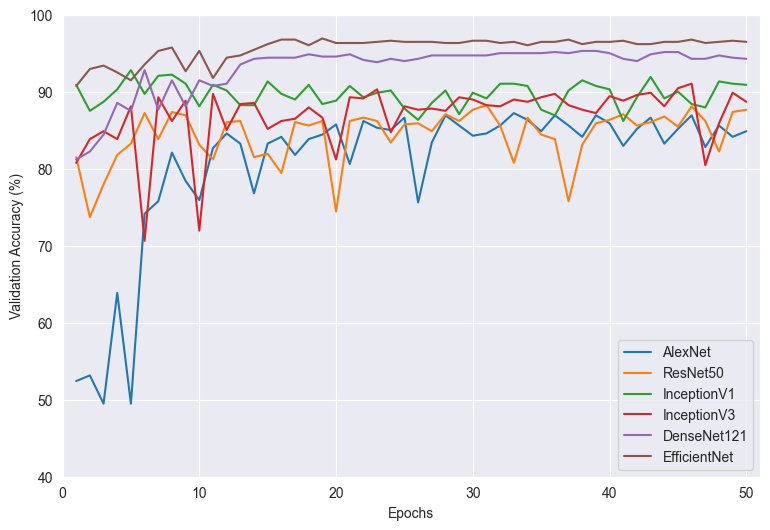

In [95]:
plt.figure(figsize=(9, 6))

# Loop over each log file to plot validation accuracy
for model_name, relative_path in training_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        # Load the CSV data
        log_data = pd.read_csv(file_path)
        
        # Plot validation accuracy if available
        if "Validation_Accuracy" in log_data.columns:
            plt.plot(log_data["Epoch"], log_data["Validation_Accuracy"], label=model_name)

# Customize the plot
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy (%)")
plt.legend(loc="lower right")
plt.grid(True)
plt.ylim(40, 100) 
plt.xlim(0, 51) 

plt.show()

## Model performance comparison table
- Total time spent was not logged in a file. It was taken directly from the Jupternotebook terminal output
- The max training accuracy for each model was considered as the training accuracy here

In [96]:
# Initialize dictionaries to store metrics
training_accuracy = {}
test_metrics = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1-Score": {}
}

# Iterate through each model's training log file to extract maximum training accuracy
for model_name, relative_path in training_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        log_data = pd.read_csv(file_path)
        # Extract the maximum training accuracy
        if "Validation_Accuracy" in log_data.columns:
            max_accuracy = log_data["Validation_Accuracy"].max()
            training_accuracy[model_name] = max_accuracy
        else:
            training_accuracy[model_name] = None 
    else:
        training_accuracy[model_name] = None 

# Extract test metrics from prediction logs
for model_name, relative_path in prediction_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        prediction_data = pd.read_csv(file_path)
        if "true_labels" in prediction_data.columns and "predicted_labels" in prediction_data.columns:
            true_labels = prediction_data["true_labels"]
            predicted_labels = prediction_data["predicted_labels"]
            # Calculate metrics
            test_metrics["Accuracy"][model_name] = accuracy_score(true_labels, predicted_labels) * 100
            test_metrics["Precision"][model_name] = precision_score(true_labels, predicted_labels, average="binary")
            test_metrics["Recall"][model_name] = recall_score(true_labels, predicted_labels, average="binary")
            test_metrics["F1-Score"][model_name] = f1_score(true_labels, predicted_labels, average="binary")
        else:
            for metric in test_metrics:
                test_metrics[metric][model_name] = None 
    else:
        for metric in test_metrics:
            test_metrics[metric][model_name] = None

# Data
model_arr = ["ResNet50", "AlexNet", "InceptionV3", "InceptionV1", "DenseNet121", "EfficientNet"]
data = {
    "Model": model_arr,
    "Layers": [151, 24, 307, 224, 121, 335],
    "Total Parameters (Millions)": [x / 1e6 for x in [23512130, 57012034,25116362, 5601954, 7978856, 4010110]],
    "Training Time (seconds)": [4635.63, 2154.25, 5151.95, 3642.16, 2273.48, 1597.75],
    "GFLOPS": [0.71, 4.13, 1.51, 2.85, 3.79, 0.53],
    "Training Accuracy (%)": [training_accuracy.get(model, "N/A") for model in model_arr],
    "Test Accuracy (%)": [test_metrics["Accuracy"].get(model, "N/A") for model in model_arr],
    "Precision": [test_metrics["Precision"].get(model, "N/A") for model in model_arr],
    "Recall": [test_metrics["Recall"].get(model, "N/A") for model in model_arr],
    "F1-Score": [test_metrics["F1-Score"].get(model, "N/A") for model in model_arr]
}

# Print data
df = pd.DataFrame(data)
print(df)

          Model  Layers  Total Parameters (Millions)  Training Time (seconds)  \
0      ResNet50     151                    23.512130                  4635.63   
1       AlexNet      24                    57.012034                  2154.25   
2   InceptionV3     307                    25.116362                  5151.95   
3   InceptionV1     224                     5.601954                  3642.16   
4   DenseNet121     121                     7.978856                  2273.48   
5  EfficientNet     335                     4.010110                  1597.75   

   GFLOPS  Training Accuracy (%)  Test Accuracy (%)  Precision    Recall  \
0    0.71              88.252570          85.058259   0.901538  0.791892   
1    4.13              87.224670          86.429061   0.915644  0.806757   
2    1.51              91.042584          89.650446   0.953775  0.836486   
3    2.85              92.804699          92.529130   0.959243  0.890541   
4    3.79              95.301028          93.625771 

## Print all confusion matrix in one plot

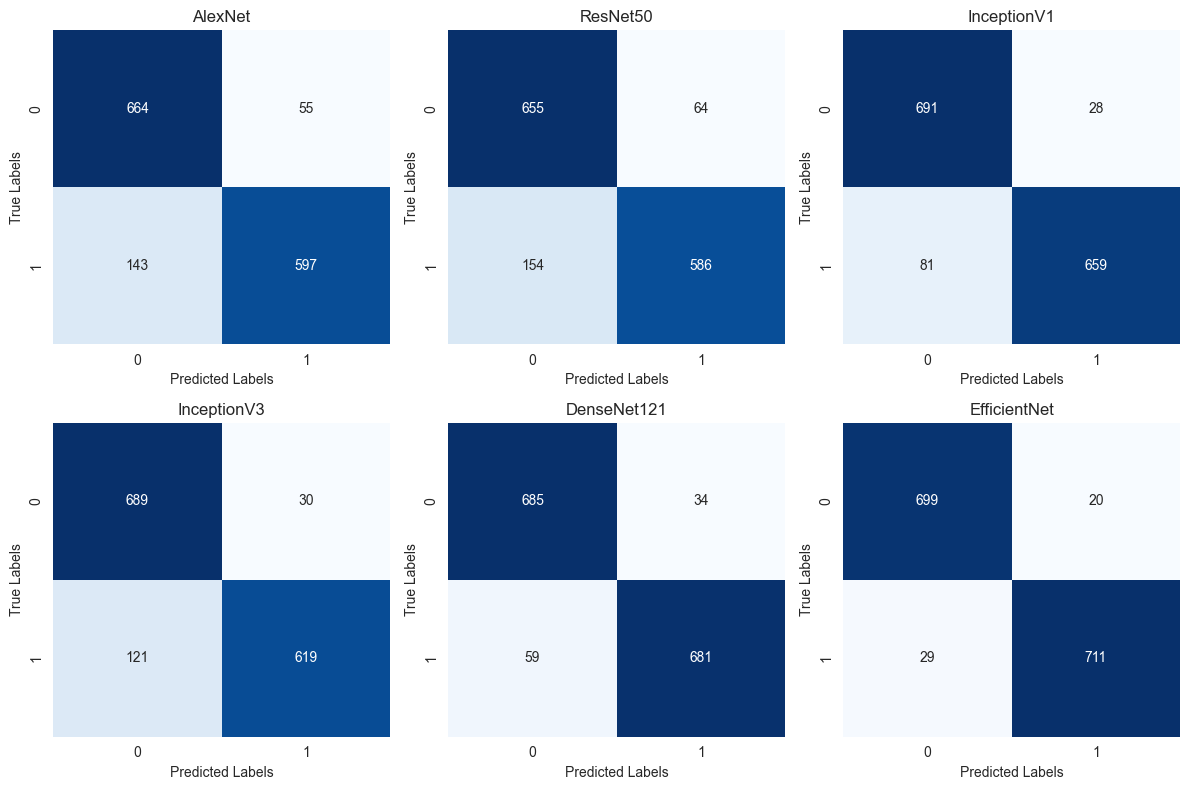

In [79]:
confusion_matrices = {}
fontsize = 8

# Calculate confusion matrices for each model
for model_name, relative_path in prediction_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        # Load predictions
        data = pd.read_csv(file_path)
        if "true_labels" in data.columns and "predicted_labels" in data.columns:
            true_labels = data["true_labels"]
            predicted_labels = data["predicted_labels"]

            # Compute confusion matrix
            cm = confusion_matrix(true_labels, predicted_labels)
            confusion_matrices[model_name] = cm

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  # Flatten to handle all axes uniformly

for idx, (model_name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[idx])
    axes[idx].set_title(f"{model_name}")
    axes[idx].set_xlabel("Predicted Labels" )
    axes[idx].set_ylabel("True Labels" )

plt.tight_layout()
plt.show()
